In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [224]:
time = 1. #(s)
nb_steps = 5000
h = time/nb_steps #0.001
ext_poisson_rate = 3.*h #Poisson rate (Hz)
nb_neuron_ext = 800
tau_AMPA = 0.002 #
V_L = -0.7 #rest potential
V_E = 0.0 #reversal potential
V_thr = -0.5
g_AMPA_ext = 1 #synaptic excitatory conductance
g_m = 1. #membrane conductance
C_m = 1. #membrane capacitance
tau_rp = 0.002
weigth = 1.0

In [225]:
def sj_dot(sj, poisson):
    return -sj/tau_AMPA #+ poisson

In [226]:
class Neuron:
    instances = []
    def __init__(self):
        Neuron.instances.append(self)
        self.V = V_L
        self.refractory_time = False
        self.start_refractory_time = -100.
    def update(self, h, ext_amp, current_t):
        if np.abs(current_t - self.start_refractory_time) < tau_rp:
            self.V = V_L
        else:
            I_AMPA_ext = g_AMPA_ext * (self.V - V_E) * ext_amp
            I_syn = I_AMPA_ext
            self.V += (-g_m * (self.V - V_L) - I_syn) * h / C_m
            if self.V > V_thr:
                self.start_refractory_time = current_t
                print(current_t)

In [227]:
for i in range(1):
    n = Neuron()

In [228]:
V_test = [V_L]
sj_list = np.zeros(nb_neuron_ext)
sj_dot_list = np.zeros(nb_neuron_ext)

for t in range(int(time/h)):
    poisson = np.random.poisson(ext_poisson_rate, nb_neuron_ext)
    for index, s in enumerate(sj_list): 
        if poisson[index]:
            sj_list[index] = 1.
        else:
            sj_list[index] += sj_dot(s, poisson[index]) * h
    
    ext_amp = sj_list.sum()
    for n in Neuron.instances:
        n.update(h, ext_amp, t*h/time)
    V_test.append(Neuron.instances[0].V)

0.077
0.15
0.22760000000000002
0.2962
0.37160000000000004
0.43220000000000003
0.514
0.5894
0.669
0.7534000000000001
0.8360000000000001
0.9052
0.9698


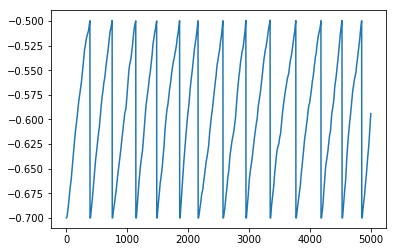

In [229]:
plt.plot(V_test)